In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras import models
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img,img_to_array,load_img 
from tensorflow.keras.models import Model 
import pandas as pd

2023-03-10 11:23:07.546724: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 11:23:07.854817: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/limsim/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-10 11:23:07.854857: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-10 11:23:08.946927: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerr

In [2]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [3]:
base_model = MobileNet(weights='imagenet')
model = Model(inputs = base_model.input,outputs = base_model.get_layer('reshape_2').output)

2023-03-10 11:23:17.398082: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 11:23:17.398778: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/limsim/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-10 11:23:17.398882: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/limsim/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-10 11:23:17.398961: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [4]:
def dir_to_category(Categories, datadir):
    flat_data_arr=[] #input array
    target_arr=[] #output array
    for i in Categories:
        print(f'loading... category: {i}')

        path = os.path.join(datadir,i)

        for img in os.listdir(path):

            img_array = load_img(os.path.join(path,img),target_size=(224,224))
            img_array = img_to_array(img_array)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            img_array = model.predict(img_array)
            flat_data_arr.append(img_array.flatten())
            target_arr.append(Categories.index(i))
        print(f'loaded categoies:{i} successfully')

    flat_data = np.array(flat_data_arr)
    target = np.array(target_arr)
    df = pd.DataFrame(flat_data)

    df['Target'] = target

    x = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    return x, y   

In [5]:
Categories=[ 'Peace',  "WhatsUp",  'Me',  'Bad',  'House',  'Good']
datadir='data' 
import os
x,y  = dir_to_category(Categories,datadir) 

loading... category: Peace
1/1 [==============================] - 0s 56ms/step
loaded categoies:Peace successfully
loading... category: WhatsUp
1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 45ms/step
loaded categoies:WhatsUp successfully
loading... category: Me
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 46ms/step
loaded categoies:Me successfully
loading... category: Bad
1/1 [==============================] - 0s 36ms/step
loaded categoies:Bad successfully
loading... category: House
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step
loaded categoies:House successfully
loading... category: Good
1/1 [==============================] - 0s 46ms/step
loaded categoies:Good successfully


In [6]:
np.save('x.npy',x)
np.save('y.npy',y)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify = y )

In [8]:
x.shape, y.shape

((614, 1000), (614,))

In [24]:
# Train an SVC classifier on the training data
clf = SVC(kernel='linear', C=1,degree = 5, random_state=42,probability = True)
clf.fit(X_train, y_train)

# Evaluate the classifier on the test data
score = clf.score(X_test, y_test)
print("Test accuracy: {:.2f}%".format(score * 100))

Test accuracy: 95.93%


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X_train, y_train)

# Evaluate the classifier on the test data
score = clf.score(X_test, y_test)
print("Test accuracy: {:.2f}%".format(score * 100))

Test accuracy: 95.12%


/home/limsim/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Evaluate the classifier on the test data
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        17
           3       0.89      0.84      0.86        19
           4       1.00      0.94      0.97        17
           5       0.88      0.91      0.89        23

    accuracy                           0.95       123
   macro avg       0.95      0.95      0.95       123
weighted avg       0.95      0.95      0.95       123

Confusion Matrix:
 [[20  0  0  0  0  0]
 [ 0 27  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 16  0  3]
 [ 1  0  0  0 16  0]
 [ 0  0  0  2  0 21]]


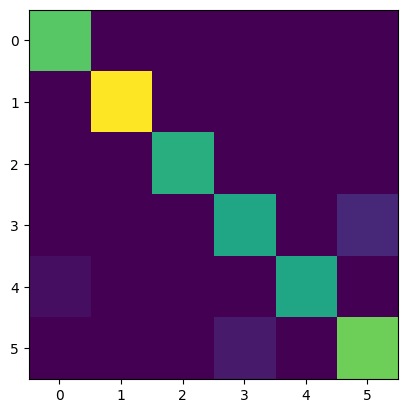

In [14]:
plt.imshow(confusion_matrix(y_test, y_pred))

In [26]:
import pickle

# Save the model to disk
filename = 'svc_model.pkl'
pickle.dump(clf, open(filename, 'wb'))


In [14]:
model.save('model.h5')

In [15]:
# Save the function to disk
filename = 'preprocessing.pkl'
with open(filename, 'wb') as f:
    pickle.dump(preprocess_input, f)

# app.py

In [15]:

# Load the preprocessing function from disk
filename = 'preprocessing.pkl'
with open(filename, 'rb') as f:
    preprocess_input = pickle.load(f)

In [16]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

In [17]:
# Load the model from disk
filename = 'svc_model.pkl'
clf = pickle.load(open(filename, 'rb'))

In [18]:
from tensorflow.keras.preprocessing.image import array_to_img,img_to_array,load_img 


In [19]:
img_array = load_img(os.path.join('data/Peace','20200903_201757.jpg'),target_size=(224,224))
img_array = img_to_array(img_array)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
img_array = model.predict(img_array)
flat_arr = img_array.flatten()
flat_arr

1/1 [==============================] - 0s 415ms/step


array([ 1.56022370e+00,  8.39020133e-01, -2.74126697e+00, -2.52777290e+00,
       -1.12781215e+00, -1.76606870e+00,  3.57591361e-02, -4.45981026e-01,
       -2.00110722e+00, -3.76554346e+00,  1.97168994e+00, -1.04692817e-01,
       -6.22638464e-02,  9.97980475e-01,  2.80125916e-01, -7.47460961e-01,
       -8.59731376e-01, -1.27129531e+00, -6.79705203e-01,  2.12553477e+00,
        1.62186611e+00, -5.53021193e+00, -4.80956125e+00, -3.16774249e+00,
       -3.43110490e+00,  1.10876727e+00,  2.65412545e+00,  7.28090906e+00,
        1.92224658e+00,  6.13956451e-01,  1.63099170e+00,  3.43452740e+00,
        3.01219916e+00,  4.02495766e+00,  1.71644521e+00,  2.78088355e+00,
        1.93670380e+00,  2.62153268e+00,  5.36702204e+00, -1.37537336e+00,
        2.43139172e+00,  4.21446562e+00,  1.24729896e+00,  1.24004102e+00,
        4.82932377e+00, -2.42786527e-01,  2.91836119e+00,  1.28569984e+00,
       -3.17759442e+00, -2.33617854e+00, -2.18364668e+00,  4.30340171e-01,
        5.89364052e+00,  

In [20]:
y_clf= clf.predict(flat_arr.reshape(1,-1))
y_clf[0]

0

In [21]:
Categories=[ 'Peace',  "WhatsUp",  'Me',  'Bad',  'House',  'Good']

In [22]:
Categories[y_clf[0]]

'Peace'

In [28]:
clf.predict_proba(flat_arr.reshape(1,-1))[0][y_clf[0]]

0.9723516352406906